100%|█████████████████████████████████████████████████████████████████████████| 201/201 [00:06<00:00, 33.25it/s]


<ErrorbarContainer object of 3 artists>

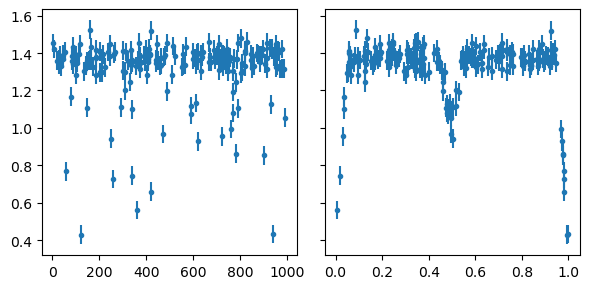

In [1]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

n_obs, period, max_time = 201, 20, 1000

b = phoebe.default_binary()
b.add_dataset('lc', times=np.random.rand(n_obs)*max_time, dataset='mylc')
b.set_value('period', component='binary', value=period)
b.set_value('teff', component='primary', value=6000)
b.set_value('teff', component='secondary', value=5000)

b.run_compute(irrad_method='none')

times = b.get_value(qualifier='times', context='model')
sigmas = np.ones(shape=(n_obs,))*0.05
fluxes = b.get_value(qualifier='fluxes', context='model') + np.random.randn(n_obs)*sigmas 


fig, ax = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True, sharey=True)
ax[0].errorbar(times, fluxes, sigmas, fmt='.')
ax[1].errorbar(np.mod(times, period)/period, fluxes, sigmas, fmt='.')